# Assignment 1 - Image Classification

This notebook contains the required task for the first assignment of the Deep Network Development course. Read the task description and implement the empty code cells. Each section represents a stage along implementing an image classifier, from loading and inspecting the dataset to training a **pre-trained** Convolutional Neural Network architecture. The sections are to guide you but you do not have to follow that specific order.

Copy this notebook to your drive (File -> Save a copy in Drive), edit it and upload the final ipynb file to [Canvas](https://canvas.elte.hu) or upload the link to the Colab notebook itself. If you have your own machine with Jupyter installed, you can work there as well.

**Note** Make sure the notebook is using GPU accelerataion in Edit -> Notebook settings, otherwise training and evaluation can be very slow.

## Rules and Comments
- From the list of datasets and architectures listed in canvas, each student was atributed **1 dataset and 1 architecture** to use within this assignment. Please confirm yours in the Canvas assignment's description.
- This is an DL class so to pass the homework you do have to implement a working classifier, just loading the data or having a "random-guess" performance is not enough.
- As always, copying others' code will make you fail the homework automatically (and thus the course).
- **Deadline is October 19**
- Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
- Feel free to add more code cells as needed. But don't put code into external Python files to ease the reviewing.
- Please add your name and Neptun ID below for easier identification.

**Name:**  Mohammad ####
**Neptun ID:** ####

## Task description
Your task is to train an already pretrained Convolutional Neural Network architecture on a dataset, both given in canvas. The datasets contain images as input and class labels as target, thus you have to solve a Supervised Machine Learning Classification problem.

The dataset shoud be divided into train, validation and test set, for which results should be presented for all.

You can either train the architecture you were given without changing its layers, or you can add more layers, if you believe it increases the accuracy. There is no expected percentage of accuracy, but **your accuracy should be better than random guessing and your loss has to decrease throughout the epochs**. We expect you to show visualisations (any of the following: matplotlib, seaborn, tensorboard, ...) of the accuracy and loss and use Early stopping while training your network.



## 0. Import libraries
Import all libraries/packages that you believe will help you fulfil the task, but **for the network only PyTorch can be used.**

In [ ]:
# ADD YOUR CODE HERE
import matplotlib.pyplot as plt
import matplotlib
import joblib
import cv2
import os
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import random
import torchvision
import warnings
warnings.filterwarnings('ignore')

from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.models import resnet18
from datetime import datetime

In [ ]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

N_EPOCHS = 12
BATCH_SIZE = 16

## 1. Dataset
Load the dataset you were given. Images should be stored in an X variable and your labels in a Y variable. Split your dataset into train, validation and test set and pre-process your data for training.

In [ ]:
from google.colab import drive
import shutil
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/Colab Notebooks/DND_sem3/assign_1/dataset/101_ObjectCategories.tar.gz'
shutil.unpack_archive(drive_path, "dataset/")


Mounted at /content/drive


#### Loading the dataset
Show some images and labels of your dataset

In [ ]:
image_paths = list(paths.list_images('dataset/101_ObjectCategories'))
print(image_paths)

['dataset/101_ObjectCategories/windsor_chair/image_0030.jpg', 'dataset/101_ObjectCategories/windsor_chair/image_0013.jpg', 'dataset/101_ObjectCategories/windsor_chair/image_0011.jpg', 'dataset/101_ObjectCategories/windsor_chair/image_0014.jpg', 'dataset/101_ObjectCategories/windsor_chair/image_0034.jpg', 'dataset/101_ObjectCategories/windsor_chair/image_0022.jpg', 'dataset/101_ObjectCategories/windsor_chair/image_0002.jpg', 'dataset/101_ObjectCategories/windsor_chair/image_0021.jpg', 'dataset/101_ObjectCategories/windsor_chair/image_0041.jpg', 'dataset/101_ObjectCategories/windsor_chair/image_0020.jpg', 'dataset/101_ObjectCategories/windsor_chair/image_0008.jpg', 'dataset/101_ObjectCategories/windsor_chair/image_0044.jpg', 'dataset/101_ObjectCategories/windsor_chair/image_0006.jpg', 'dataset/101_ObjectCategories/windsor_chair/image_0010.jpg', 'dataset/101_ObjectCategories/windsor_chair/image_0017.jpg', 'dataset/101_ObjectCategories/windsor_chair/image_0053.jpg', 'dataset/101_ObjectCate

In [ ]:
image_paths = list(paths.list_images('dataset/101_ObjectCategories'))
# print(image_paths)
data = []
labels = []
for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(label)
data = np.array(data, dtype=object)
labels = np.array(labels, dtype=object)

In [ ]:
print(data.size)
print(labels.size)

9144
9144


In [ ]:
lb = LabelBinarizer()
labels_cat = labels
labels = lb.fit_transform(labels)
print(f"Total number of classes: {len(lb.classes_)}")

Total number of classes: 102


In [ ]:
print(lb.classes_)

['BACKGROUND_Google' 'Faces' 'Faces_easy' 'Leopards' 'Motorbikes'
 'accordion' 'airplanes' 'anchor' 'ant' 'barrel' 'bass' 'beaver'
 'binocular' 'bonsai' 'brain' 'brontosaurus' 'buddha' 'butterfly' 'camera'
 'cannon' 'car_side' 'ceiling_fan' 'cellphone' 'chair' 'chandelier'
 'cougar_body' 'cougar_face' 'crab' 'crayfish' 'crocodile'
 'crocodile_head' 'cup' 'dalmatian' 'dollar_bill' 'dolphin' 'dragonfly'
 'electric_guitar' 'elephant' 'emu' 'euphonium' 'ewer' 'ferry' 'flamingo'
 'flamingo_head' 'garfield' 'gerenuk' 'gramophone' 'grand_piano'
 'hawksbill' 'headphone' 'hedgehog' 'helicopter' 'ibis' 'inline_skate'
 'joshua_tree' 'kangaroo' 'ketch' 'lamp' 'laptop' 'llama' 'lobster'
 'lotus' 'mandolin' 'mayfly' 'menorah' 'metronome' 'minaret' 'nautilus'
 'octopus' 'okapi' 'pagoda' 'panda' 'pigeon' 'pizza' 'platypus' 'pyramid'
 'revolver' 'rhino' 'rooster' 'saxophone' 'schooner' 'scissors' 'scorpion'
 'sea_horse' 'snoopy' 'soccer_ball' 'stapler' 'starfish' 'stegosaurus'
 'stop_sign' 'strawberry'

In [ ]:
# define transforms
train_transform = transforms.Compose(
    [transforms.ToPILImage(),
     transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])])
val_transform = transforms.Compose(
    [transforms.ToPILImage(),
     transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])])

#### Splitting the dataset

In [ ]:
# ADD YOUR CODE HERE
# divide the data into train, validation, and test set (60% train, 20% validation, 20% test)

(X, x_val , Y, y_val) = train_test_split(data, labels,
                                                    test_size=0.2,
                                                    stratify=labels,
                                                    random_state=42)

(x_train, x_test, y_train, y_test) = train_test_split(X, Y,
                                                    test_size=0.25,
                                                    random_state=42)

print("x_train: {x_train.shape}")
print("x_test : {x_test.shape}")
print("x_val  : {x_val.shape}")

x_train: {x_train.shape}
x_test : {x_test.shape}
x_val  : {x_val.shape}


#### Pre-processing the dataset

In [ ]:
# ADD YOUR CODE HERE
# custom dataset
class caltechDataset(Dataset):
    def __init__(self, images, labels=None, transforms=None):
        self.X = images
        self.y = labels
        self.transforms = transforms

    def __len__(self):
        return (len(self.X))

    def __getitem__(self, i):
        data = self.X[i][:]

        if self.transforms:
            data = self.transforms(data)

        if self.y is not None:
            return (data, self.y[i])
        else:
            return data

train_data = caltechDataset(x_train, y_train, train_transform)
val_data = caltechDataset(x_val, y_val, val_transform)
test_data = caltechDataset(x_test, y_test, val_transform)

In [ ]:
# dataloaders
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
validation_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
labels_cat_unique = np.unique(labels_cat)
print(labels_cat_unique)

['BACKGROUND_Google' 'Faces' 'Faces_easy' 'Leopards' 'Motorbikes'
 'accordion' 'airplanes' 'anchor' 'ant' 'barrel' 'bass' 'beaver'
 'binocular' 'bonsai' 'brain' 'brontosaurus' 'buddha' 'butterfly' 'camera'
 'cannon' 'car_side' 'ceiling_fan' 'cellphone' 'chair' 'chandelier'
 'cougar_body' 'cougar_face' 'crab' 'crayfish' 'crocodile'
 'crocodile_head' 'cup' 'dalmatian' 'dollar_bill' 'dolphin' 'dragonfly'
 'electric_guitar' 'elephant' 'emu' 'euphonium' 'ewer' 'ferry' 'flamingo'
 'flamingo_head' 'garfield' 'gerenuk' 'gramophone' 'grand_piano'
 'hawksbill' 'headphone' 'hedgehog' 'helicopter' 'ibis' 'inline_skate'
 'joshua_tree' 'kangaroo' 'ketch' 'lamp' 'laptop' 'llama' 'lobster'
 'lotus' 'mandolin' 'mayfly' 'menorah' 'metronome' 'minaret' 'nautilus'
 'octopus' 'okapi' 'pagoda' 'panda' 'pigeon' 'pizza' 'platypus' 'pyramid'
 'revolver' 'rhino' 'rooster' 'saxophone' 'schooner' 'scissors' 'scorpion'
 'sea_horse' 'snoopy' 'soccer_ball' 'stapler' 'starfish' 'stegosaurus'
 'stop_sign' 'strawberry'

airplanes BACKGROUND_Google rhino airplanes barrel Faces joshua_tree dolphin sunflower Faces_easy   emu cougar_face Faces hawksbill BACKGROUND_Google cougar_face


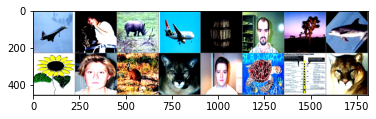

In [ ]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     #because images were normalized when loaded, for visualization purposes we unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #reorder the channels
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# print labels
print(' '.join('%5s' % lb.classes_[torch.max(labels[j], 0)[1]] for j in range(BATCH_SIZE)))
# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
print(lb.classes_[torch.max(labels[1], 0)[1]])

BACKGROUND_Google


## 2. Convolutional Neural Network Architecture
Load the CNN architecture you were given using pretrained weights. Define the optimizer and loss function. Train your network and save it. Remember to use Early stopping and show results.

#### Load the architecture

In [ ]:
#Using the Resnet18 CNN
resnet_model = resnet18(pretrained=True)

#Updatingthe last classifier that is the output layer of the network.
resnet_model.fc = nn.Linear(512, len(lb.classes_))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

#### Define your optimizer and loss function

In [ ]:
# ADD YOUR CODE HERE

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.Adam(resnet_model.parameters(), lr=0.001)

In [ ]:
#Set up GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

resnet_model.to(device)

cuda:0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
class EarlyStopping():
    """
    Early stopping to stop the training when the loss does not improve after
    certain epochs.
    """
    def __init__(self, patience=5, min_delta=0):
        """
        :param patience: how many epochs to wait before stopping when loss is
               not improving
        :param min_delta: minimum difference between new loss and old loss for
               new loss to be considered as an improvement
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model = './best_net.pth'

    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            torch.save(resnet_model.state_dict(), self.best_model)
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

In [ ]:
def get_accuracy(model, data_loader, device):
    '''
    Function for computing the accuracy of the predictions over the entire data_loader
    '''

    correct_pred = 0
    n = 0

    with torch.no_grad():
        model.eval()
        for X, y_true in data_loader:

            X = X.to(device)
            y_true = y_true.to(device)

            y_prob = model(X)
            _, predicted_labels = torch.max(y_prob, 1)

            n += torch.max(y_true, 1)[1].size(0)
            correct_pred += (predicted_labels == torch.max(y_true, 1)[1]).sum()

    return correct_pred.float() / n

def plot_losses(train_losses, valid_losses):
    '''
    Function for plotting training and validation losses
    '''

    # temporarily change the style of the plots to seaborn
    plt.style.use('seaborn')

    train_losses = np.array(train_losses)
    valid_losses = np.array(valid_losses)

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training loss')
    ax.plot(valid_losses, color='red', label='Validation loss')
    ax.set(title="Loss over epochs",
            xlabel='Epoch',
            ylabel='Loss')
    ax.legend()
    fig.show()

    # change the plot style to default
    plt.style.use('default')

In [ ]:
def train(train_loader, model, criterion, optimizer, device):
    '''
    Function for the training step of the training loop
    '''
    model.train()

    running_loss = 0

    for X, y_true in train_loader:

        optimizer.zero_grad()

        X = X.to(device)
        y_true = y_true.to(device)

        # Forward pass
        y_hat = model(X)
        loss = criterion(y_hat, torch.max(y_true, 1)[1])
        running_loss += loss.item() * X.size(0)

        # Backward pass
        loss.backward()
        optimizer.step()

    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss

def validate(valid_loader, model, criterion, device):
    '''
    Function for the validation step of the training loop
    '''

    model.eval()
    running_loss = 0

    for X, y_true in valid_loader:

        X = X.to(device)
        y_true = y_true.to(device)

        # Forward pass and record loss
        y_hat = model(X)
        loss = criterion(y_hat, torch.max(y_true, 1)[1])
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)

    return model, epoch_loss

In [ ]:
def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    '''
    Function defining the entire training loop
    '''

    # set objects for storing metrics
    best_loss = 1e10
    train_losses = []
    valid_losses = []

    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        # it will print in every epoch
        if epoch % print_every == (print_every - 1):

            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)

            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

            early_stopping(valid_loss)
            if early_stopping.early_stop:
                break


    return model, optimizer, train_losses, valid_losses

In [ ]:
# Early stopping
early_stopping = EarlyStopping()

#### Train your network

In [ ]:
# ADD YOUR CODE HERE
model, optimizer, train_losses, valid_losses = training_loop(resnet_model, criterion, optimizer, train_loader, validation_loader, N_EPOCHS, device)

12:05:04 --- Epoch: 0	Train loss: 2.5194	Valid loss: 1.7565	Train accuracy: 64.16	Valid accuracy: 58.83
12:05:47 --- Epoch: 1	Train loss: 1.2672	Valid loss: 1.2067	Train accuracy: 77.42	Valid accuracy: 68.78
12:06:32 --- Epoch: 2	Train loss: 0.7394	Valid loss: 0.9673	Train accuracy: 87.24	Valid accuracy: 74.47
12:07:17 --- Epoch: 3	Train loss: 0.4650	Valid loss: 1.0163	Train accuracy: 90.43	Valid accuracy: 75.94
INFO: Early stopping counter 1 of 5
12:08:01 --- Epoch: 4	Train loss: 0.2770	Valid loss: 0.8287	Train accuracy: 95.17	Valid accuracy: 77.58
12:08:46 --- Epoch: 5	Train loss: 0.1845	Valid loss: 0.9287	Train accuracy: 95.19	Valid accuracy: 77.31
INFO: Early stopping counter 2 of 5
12:09:30 --- Epoch: 6	Train loss: 0.1979	Valid loss: 0.9147	Train accuracy: 95.81	Valid accuracy: 77.86
INFO: Early stopping counter 3 of 5
12:10:15 --- Epoch: 7	Train loss: 0.1649	Valid loss: 1.0637	Train accuracy: 95.99	Valid accuracy: 76.05
INFO: Early stopping counter 4 of 5
12:11:00 --- Epoch: 8	Tr

#### Show results (accuracy and loss) on training and validation sets

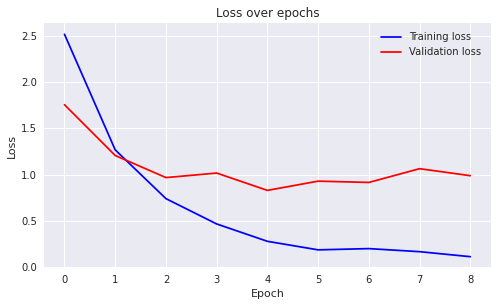

In [ ]:
# ADD YOUR CODE HERE
plot_losses(train_losses, valid_losses)

In [ ]:
# save the model
PATH = './resnet_18.pth'
torch.save(resnet_model.state_dict(), PATH)

## 3. Conclusion (Evaluation)
Load your trained CNN and evaluate it on the test set. Show some predictions on the test set (3 is enough) by ploting the image and printing the prediction and ground truth.

How good are your results? Do you think the network is overfitted or underfitted? If yes, what do you think lead to that? If not, justify.

#### Evaluate your model

In [ ]:
# ADD YOUR CODE HERE
#Testing Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = resnet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += torch.max(labels, 1)[1].size(0)
        correct += (predicted == torch.max(labels, 1)[1]).sum().item()

print('Accuracy of the network on the 60 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 60 test images: 78 %


#### Show some predictions

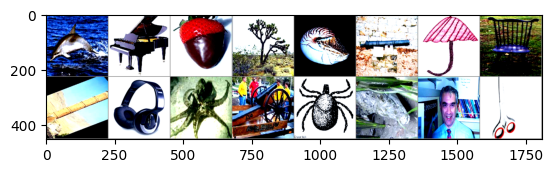

GroundTruth:  dolphin grand_piano strawberry joshua_tree nautilus cannon umbrella windsor_chair minaret headphone octopus cannon  tick crocodile_head Faces scissors
Predicted:  dolphin grand_piano strawberry joshua_tree cellphone helicopter  lamp windsor_chair minaret headphone scorpion cannon  tick BACKGROUND_Google Faces scissors


In [ ]:
# ADD YOUR CODE HERE
data_iter = iter(test_loader)
data = data_iter.next()
images = data[0]
labels = data[1]
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % lb.classes_[torch.max(labels[j], 0)[1]] for j in range(BATCH_SIZE)))

images, labels = data[0].to(device), data[1].to(device)

# AlexNet_model.to(DEVICE)
# AlexNet_model.to(DEVICE).load_state_dict(torch.load(PATH))

outputs = resnet_model(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % lb.classes_[predicted[j]] for j in range(BATCH_SIZE)))

In [ ]:
print(predicted)

tensor([34, 47, 90, 54, 22, 51, 57, 99, 66, 49, 82, 19, 92,  0,  1, 81],
       device='cuda:0')


#### Answer the questions

# How good are your results?
The results were good, it achieved 78% accuracy which is quite acceptable.

# Do you think the network is overfitted or underfitted?
The network was stopped in the early stages of overfitting.
It is not underfitted because we saw a decrease in validation lose through the epochs, which means the model was learning and getting good results. But when the loss for the validation started to increase again, here we stopped the model before it gets significantly higher to avoid overfitting.

# If yes, what do you think lead to that? If not, justify.
Not, it was stopped in early stages from getting over fitted.